## Analyse av topp 10 dager med høyest temperatur 

*Resultatet viser de ti varmeste dagene i Oslo over 6 år (2010-2016) hvor dataen er hentet fra frostAPI.*

**Observasjoner:**
- Sommeren 2014 var ekstremt varm: hele 9 av 10 varmeste dager forekom i juli 2014. 
- Lav nedbør: 6/10 dager hadde 0 mm nedbør, noe som ofte gir sterk soloppvarming (samsvarer altså med den høye temperaturen).
- Moderat vind: De fleste dagene hadde vindhastigheter på rundt 2 m/s.

**Tolkning:**
Analysen tyder på at 2014 var et unormalt varmt år i Oslo, spesielt i juli. Det høye antallet ekstremt varme dager på rad kan tyde på en varmebølge, som er et fenomen ofte knyttet til klimaendringer og økt global temperatur.

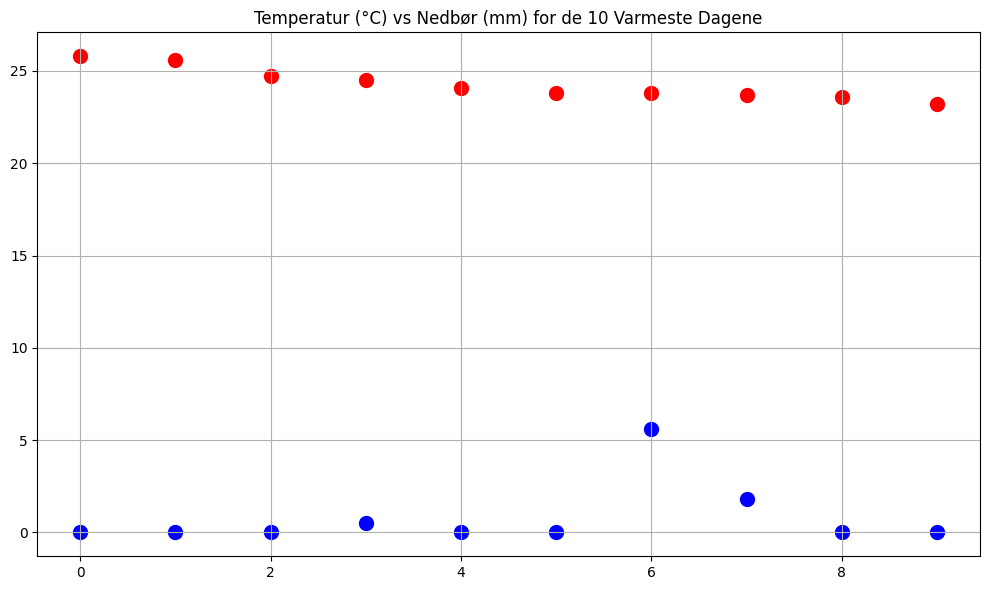

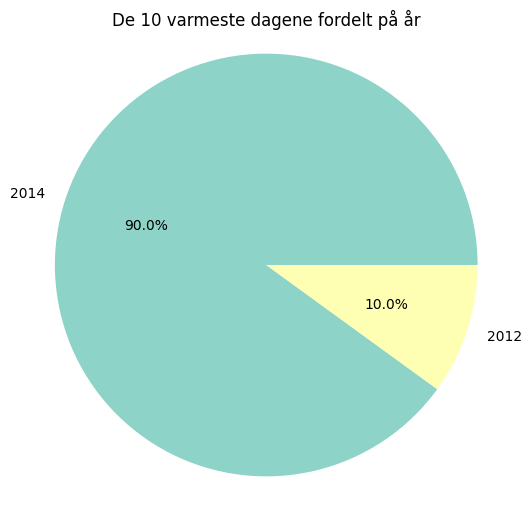

         Dato  Nedbør  Temperatur  Vindhastighet  Interpolert_Nedbør  \
0  2014-07-24     0.0        25.8            1.9                   0   
1  2014-07-26     0.0        25.6            2.0                   0   
2  2014-07-10     0.0        24.7            2.1                   0   
3  2014-07-25     0.5        24.5            1.7                   0   
4  2014-07-22     0.0        24.1            2.0                   0   
5  2012-05-26     0.0        23.8            4.0                   0   
6  2014-07-27     5.6        23.8            1.8                   0   
7  2014-07-23     1.8        23.7            1.9                   0   
8  2014-07-11     0.0        23.6            1.9                   0   
9  2014-07-12     0.0        23.2            2.0                   0   

   Interpolert_Temperatur  Interpolert_Vindhastighet    År  
0                       0                          0  2014  
1                       0                          0  2014  
2                       

In [2]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql
import matplotlib.pyplot as plt
import json
import seaborn as sns 

def analyze_hottest_days(df, date, temp, precip, n_days):
    """
    Analyserer de varmeste dagene basert på temperatur, visualiserer sammenhengen 
    med nedbør, og lager et kakediagram for å vise fordeling på år.

    Args:
        df (pd.DataFrame): DataFrame med værdata.
        date (str): Kolonnenavn for dato.
        temp (str): Kolonnenavn for temperatur.
        precip (str): Kolonnenavn for nedbør.
        n_days (int): Antall varmeste dager å analysere.
    
    Returns:
        pd.DataFrame: DataFrame med de varmeste dagene.
    """

    # SQL-spørring for å hente n varmeste dager 
    query = f"""
    SELECT *
    FROM df
    ORDER BY {temp} DESC
    LIMIT {n_days}
"""
    result = psql.sqldf(query, locals())

    # Visualisering med scatterplot av temp vs nedbør
    plt.figure(figsize=(10, 6))
    x = range(len(result))
    plt.scatter(x, result[temp], color='red', label=f'{temp} (°C)', s=100)
    plt.scatter(x, result[precip], color='blue', label=f'{precip} (mm)', s=100)
    plt.title(f'{temp} (°C) vs {precip} (mm) for de {n_days} Varmeste Dagene')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Kakediagram for å vise fordelingen av vamrme dager etter år 
    # Legger til en kolonne med år
    result['År'] = pd.to_datetime(result[date]).dt.year

    # Teller hvor mange ganger hvert år forekommer
    år_telling = result['År'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(
        år_telling,
        labels=år_telling.index,
        autopct='%1.1f%%',
        colors=plt.cm.Set3.colors 
    )
    plt.title(f"De {n_days} varmeste dagene fordelt på år")
    plt.axis('equal')
    plt.show()

    return result 

def analyze_frost_api_clean_data():
    """
    Leser inn rengjorte værdata fra frostAPI og kaller den generelle funksjonen "analyze_hottest_days
    for å analysere de varmeste dagene med hensyn på temperatur og nedbør. 

    Returns:
        pd.DataFrame: DataFrame med de varmeste dagene.
    """
   
    # Leser inn rengjort værdata fra frostAPI
    file_name = "../data/clean_data/frostAPI_clean_data.json"  
    df = pd.read_json(file_name)
    # Kaller den generelle analysen med spesifikke kolonnenavn
    return analyze_hottest_days(df, date="Dato", temp="Temperatur", precip="Nedbør", n_days=10)

result = analyze_frost_api_clean_data()
print(result)

## Analyse av topp 10 dager med lavest temperatur

*Resultatet viser de ti kaldeste dagene i Oslo over 6 år (2010-2016) hvor dataen er hentet fra frostAPI.*

**Observasjoner:**
- Fire av de 10 kaldeste dagene stammer fra 2010, noe som indikerer en spesielt kald vinter dette året.
- 9/10 av de kaldeste dagene forekom før 2014.

**Tolkning:**
Dataene fra 2010 til 2016 viser at ekstrme kuldedager forekom relativt hyppig i starten av perioden. Etter 2013 avtar dog antall ekstremt kalde dager, og den siste kuldedagen i listen er fra 2016. Dette kan tyde på en tendens mot mildere vintre, og indikere et gradvis varmere klima. 

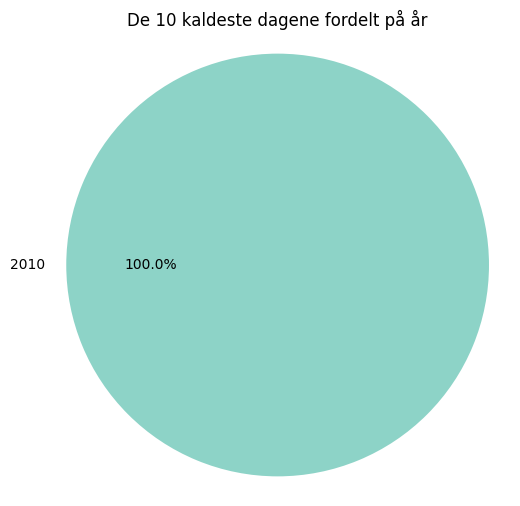

         Dato Temperatur    År
0  2010-01-01       None  2010
1  2010-01-02       None  2010
2  2010-01-03       None  2010
3  2010-01-04       None  2010
4  2010-01-05       None  2010
5  2010-01-06       None  2010
6  2010-01-07       None  2010
7  2010-01-08       None  2010
8  2010-01-09       None  2010
9  2010-01-10       None  2010


In [3]:

def analyze_coldest_days(df, date, temp, n_days):
    """
    Analyserer de kaldeste dagene i et datasett.

    Args:
        df (pd.DataFrame): DataFrame med værdata.
        date (str): Kolonnenavn for dato.
        temp (str): Kolonnenavn for temperatur.
        n_days (int): Antall kaldeste dager å analysere.
    
    Returns:
        pd.DataFrame: DataFrame med de kaldeste dagene og deres år.
    """
    
    # SQL-spørring for å finne de 10 dagene med lavest temperatur
    query = f"""
        SELECT {date}, {temp}
        FROM df 
        ORDER BY {temp} ASC 
        LIMIT {n_days}
    """
    result = psql.sqldf(query, locals())

    # Kakediagram for å vise fordelingen av de kaldeste dagene etter år
    # Legger til en kolonne med år
    result['År'] = pd.to_datetime(result[date]).dt.year

    # Teller hvor mange ganger hvert år forekommer blant de kaldeste dagene
    år_telling = result['År'].value_counts()


    plt.figure(figsize=(6, 6))
    plt.pie(
        år_telling,
        labels=år_telling.index,
        autopct='%1.1f%%',
        colors=plt.cm.Set3.colors 
    )
    plt.title(f"De {n_days} kaldeste dagene fordelt på år")
    plt.axis('equal')
    plt.show()

    return result 

def analyze_coldest_frost_api_data():
    """
    Leser inn værdata fra frostAPI og analyserer de kaldeste dagene ved å kalle 
    den generelle funksjonen "analyze_coldest_days".
    
    Returns:
        pd.DataFrame: DataFrame med de kaldeste dagene og deres år.
    """
    
    file_name = "../data/clean_data/frostAPI_clean_data.json"
    df = pd.read_json(file_name)
    return analyze_coldest_days(df, date="Dato", temp="Temperatur", n_days=10)


result = analyze_coldest_frost_api_data()
print(result)


## Analyse av gjennomsnittlig temperatur per år 

*Resultatet viser gjennnomsnittstemperaturen per år i Oslo over 6 år (2010-2016) hvor dataen er hentet fra frostAPI.*

**Generell trend:**
Gjennomsnittstemperaturen per år i Oslo ser ut til å ha holdt seg relatvit stabilt de siste årene (et stabilt resultat på mellom 6 og 9 grader celcius). Dette kan indikere et relativt stabilit klima uten en klar stigende eller synkende trend over disse årene. 

**Avvik:**
Data for 2010 inkluderer bare perioden fra 1. april og ut året, noe som kan gjøre temperaturen høyere enn normalt årsgrunnlag siden vintermånedene mangler.

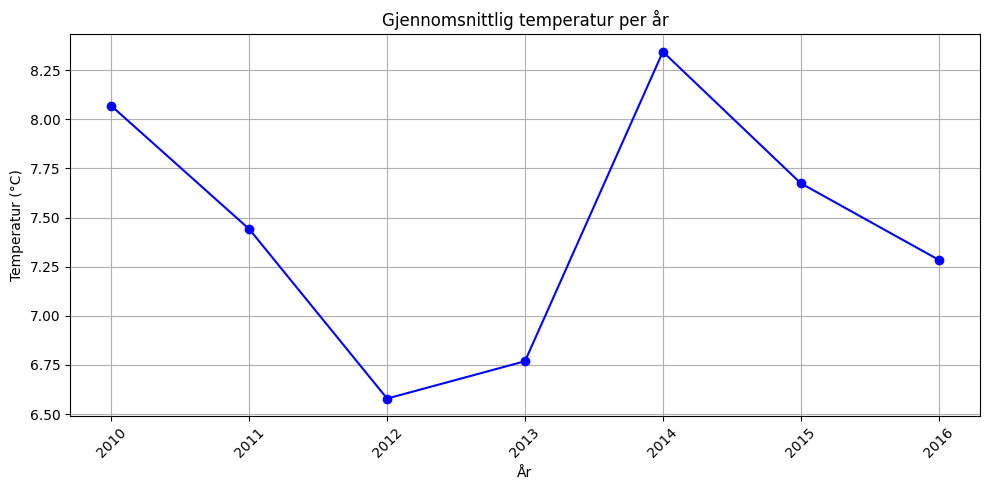

     År  Gjennomsnitt_temperatur
0  2010                 8.068613
1  2011                 7.441370
2  2012                 6.578689
3  2013                 6.768767
4  2014                 8.344384
5  2015                 7.674795
6  2016                 7.285205


In [ ]:

def analyze_avg_temperature_per_year(df, date, temp):
    """
    Beregner gjennomsnittlig temperatur per år og visualiserer resultatet basert på en DataFrame med værdata.
    
    Args:
        df (pd.DataFrame): DataFrame med værdata.
        date (str): Kolonnenavn for dato.
        temp (str): Kolonnenavn for temperatur.
    
    Returns:
        result (pd.DataFrame): DataFrame med gjennomsnittlig temperatur per år.
    """
    
    # SQL-spørring for å finne gjennomsnittlig temperatur per år
    query = f"""
        SELECT strftime('%Y', {date}) AS År,
            AVG({temp}) AS Gjennomsnitt_temperatur
        FROM df
        GROUP BY År
        ORDER BY År
    """
    result = psql.sqldf(query, locals())

    # Visualisering av gjennomsnittlig temperatur per år
    plt.figure(figsize=(10, 5))
    plt.plot(result['År'], result['Gjennomsnitt_temperatur'], marker='o', color='blue', linestyle='-')
    plt.title("Gjennomsnittlig temperatur per år")
    plt.xlabel("År")
    plt.ylabel("Temperatur (°C)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return result 

def analyze_avg_temp_frost_api_data():
    """
    Leser inn rengjorte værdata fra frostAPI og analyserer gjennomsnittlig temperatur per år 
    ved å kalle den generelle funksjonen "analyze_avg_temperature_per_year".

    Returns: 
        result (pd.DataFrame): DataFrame med gjennomsnittlig temperatur per år.
    """
    
    file_name = "../data/clean_data/frostAPI_clean_data.json"
    df = pd.read_json(file_name)
    return analyze_avg_temperature_per_year(df, date="Dato", temp="Temperatur")


result = analyze_avg_temp_frost_api_data()
print(result)

## Gjennomsnittlig nedbør, temperatur og vindhastighet per uke 

*Viser gjennomsnittlig nedbør, temperatur og vindhastighet per uke i Oslo fra 2010-2016.*


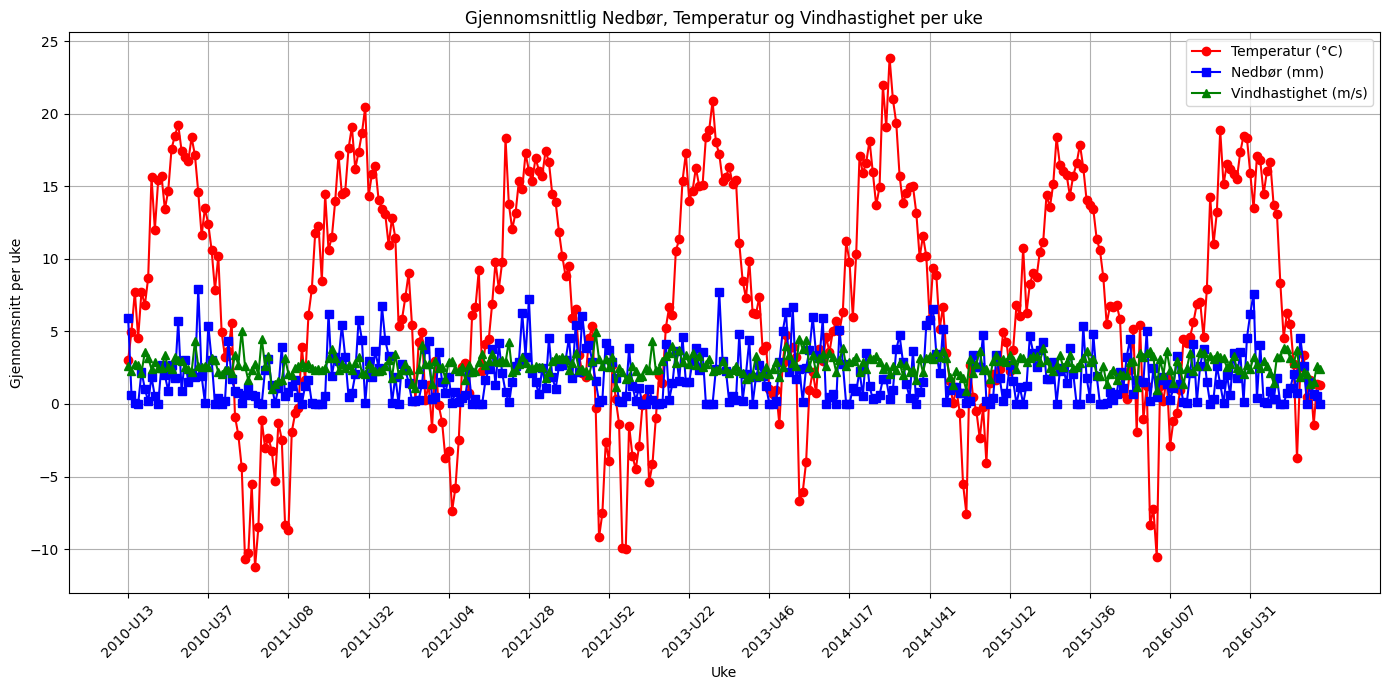

          Uke  Avg_Nedbør  Avg_Temperatur  Avg_Vindhastighet
0    2010-U13    5.950000        3.000000           2.600000
1    2010-U14    0.642857        4.985714           2.300000
2    2010-U15    0.057143        7.728571           2.757143
3    2010-U16    0.014286        4.571429           2.671429
4    2010-U17    2.228571        7.742857           2.157143
..        ...         ...             ...                ...
353  2016-U48    0.028571        0.500000           2.028571
354  2016-U49    1.514286        1.657143           1.357143
355  2016-U50    0.671429       -1.428571           1.485714
356  2016-U51    0.571429        1.385714           2.642857
357  2016-U52    0.000000        1.333333           2.400000

[358 rows x 4 columns]


In [ ]:
def analyze_weekly_avg_data(df, date, precip, temp, wind):
    """
    Beregner og visualiserer ukentlig gjennomsnitt for nedbør, temperatur og vindhastighet basert på værdata.

    Args:
        df (pd.DataFrame): DataFrame med værdata.
        date (str): Kolonnenavn for dato.
        precip (str): Kolonnenavn for nedbør.
        temp (str): Kolonnenavn for temperatur.
        wind (str): Kolonnenavn for vindhastighet.
    
    Returns:
        pd.DataFrame: DataFrame med ukentlig gjennomsnitt for nedbør, temperatur og vindhastighet.
    """

    # Legger til en kolonne for uke
    df['Uke'] = pd.to_datetime(df[date]).dt.strftime('%Y-U%U')

    # SQL-spørring for å beregne gjennomsnitt per uke
    query = f"""
        SELECT
            Uke,
            AVG({precip}) AS Avg_Nedbør,
            AVG({temp}) AS Avg_Temperatur,
            AVG({wind}) AS Avg_Vindhastighet
        FROM df
        GROUP BY Uke
        ORDER BY Uke
    """
    result = psql.sqldf(query, locals())

    # Plotter resultatet 
    plt.figure(figsize=(14, 7))

    # Plot temperatur (rød)
    plt.plot(result['Uke'], result['Avg_Temperatur'], label='Temperatur (°C)', color='red', marker='o')
    # Plot nedbør (blå)
    plt.plot(result['Uke'], result['Avg_Nedbør'], label='Nedbør (mm)', color='blue', marker='s')
    # Plot vindhastighet (grønn)
    plt.plot(result['Uke'], result['Avg_Vindhastighet'], label='Vindhastighet (m/s)', color='green', marker='^')

    plt.xlabel('Uke')
    plt.ylabel('Gjennomsnitt per uke')
    plt.title('Gjennomsnittlig Nedbør, Temperatur og Vindhastighet per uke')
    plt.xticks(result['Uke'][::24], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return result

def analyze_weekly_avg_frost_api_data():
    """
    Leser inn rengjorte værdata fra frostAPI og analyserer ukentlig gjennomsnitt for nedbør, temperatur og vindhastighet 
    ved å kalle den generelle funksjonen "analyze_weekly_avg_data".

    Returns:
        pd.DataFrame: DataFrame med ukentlig gjennomsnitt for nedbør, temperatur og vindhastighet.
    """
    
    file_name = "../data/clean_data/frostAPI_clean_data.json"
    df = pd.read_json(file_name)
    return analyze_weekly_avg_data(
        df,
        date="Dato",
        precip="Nedbør",
        temp="Temperatur",
        wind="Vindhastighet"
    )


result = analyze_weekly_avg_frost_api_data()
print(result)

## Analyse av sammenhenger mellom vær og luftkvalitet

*Resultatet viser sammenhengen mellom graden av temperatur og O3 og graden av vindhastighet og NO2.*

**Korrelasjonsanalyse:**

Korrelasjonskoeffisenten ble beregenet med Pearson-metoden:
- Korrelasjon temp og O3 = 0,315
- Korrelasjon vindhastighet og NO2 = -0,56

En korrelasjon på 0,315 tilsier en moderat positiv sammenheng mellom temperatur og ozon-nivå. Funnet tilsier at ozon dannes lettere på varme dager - noe som kan ha konsekvenser for luftkvalitet.

En korrelasjon på -0,56 tilsier en moderat til sterk negativ sammenheng. Funnet tilsier at vind bidrar til å spre forurensning (spesielt NO2) og det er derfor lavere konsentrasjoner lokalet ved høy vindhastighet. 

**Visualisering:**


Scatterplottet viser korrelassjonsfunnene visuelt:
- Scatterplottet for temperatur og ozon viser en tendens til høyere ozon-nivå ved høyere temperatur. 
- Scatterplottet for vindhastighet og NO2 viser en negativ trend hvor høyere vind gir lavere NO2. 


      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
2460       -13.6  21.062500
2461       -13.8  59.408270
2462       -14.0  25.820833
2463       -14.1  59.841476
2464       -15.7  59.812595

[2465 rows x 2 columns]
      Vindhastighet  Verdi_NO2
0               6.2  14.058333
1               6.2  12.108333
2               6.2  12.650000
3               6.1  29.375000
4               6.1  13.650000
...             ...        ...
2460            0.6  62.052577
2461            0.6  78.366667
2462            0.6  78.195833
2463            0.6  88.712500
2464            0.6  48.716667

[2465 rows x 2 columns]
Korrelasjon mellom Temperatur og Verdi_O3: 0.3152867638469338
Korrelasjon mellom Vindhastighet og Verdi_NO2: -0.5601364794153099


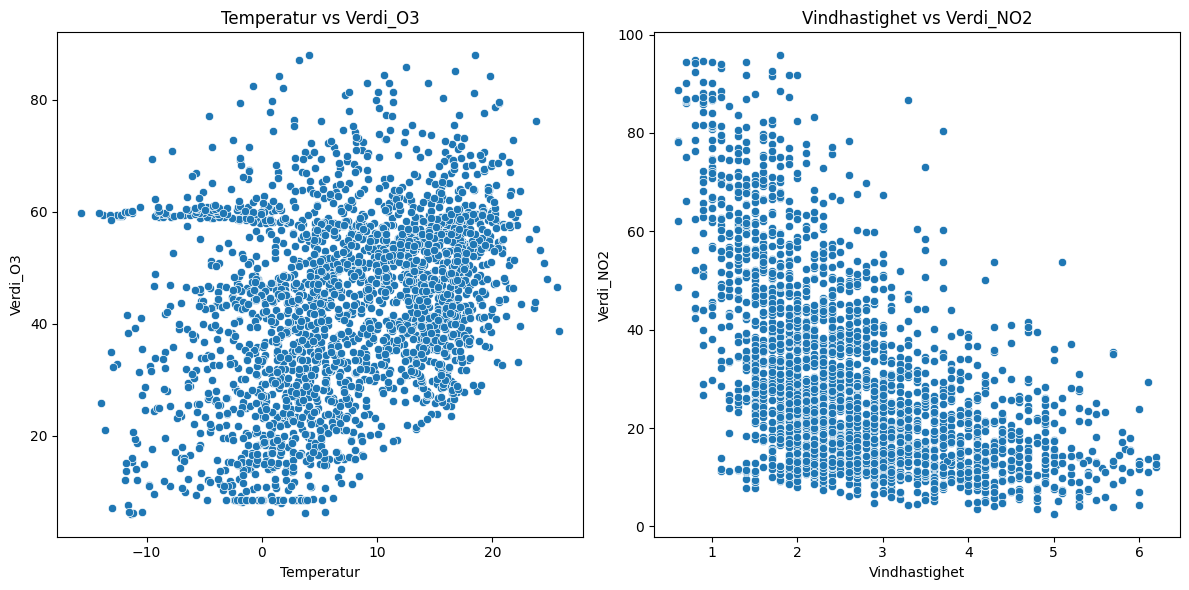

(      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
2460       -13.6  21.062500
2461       -13.8  59.408270
2462       -14.0  25.820833
2463       -14.1  59.841476
2464       -15.7  59.812595

[2465 rows x 2 columns],       Vindhastighet  Verdi_NO2
0               6.2  14.058333
1               6.2  12.108333
2               6.2  12.650000
3               6.1  29.375000
4               6.1  13.650000
...             ...        ...
2460            0.6  62.052577
2461            0.6  78.366667
2462            0.6  78.195833
2463            0.6  88.712500
2464            0.6  48.716667

[2465 rows x 2 columns], np.float64(0.3152867638469338), np.float64(-0.5601364794153099))


In [ ]:
def analyze_correlation_between_weather_and_air_quality(
        df1, df2, date, weather1, airquality1, weather2, airquality2
):
    """
    Fletter sammen vær- og luftkvalitetsdata på dato, og analyserer Pearson-korrelasjonen mellom to par av variabler.
    Resultatene visualiseres med scatter plots og korrelasjonskoeffisientene beregnes.

    Args:
        df1 (pd.DataFrame): DataFrame med værdata.
        df2 (pd.DataFrame): DataFrame med luftkvalitetsdata.
        date (str): Kolonnenavn for dato.
        weather1 (str): Kolonnenavn for første værparameter.
        airquality1 (str): Kolonnenavn for første luftkvalitetsparameter.
        weather2 (str): Kolonnenavn for andre værparameter.
        airquality2 (str): Kolonnenavn for andre luftkvalitetsparameter.
    
    Returns:
        tuple: Resultater fra SQL-spørringer og korrelasjonsberegninger.
    """
    
    # Merge DataFrames på dato
    merged_df = pd.merge(df1, df2, on=date, how="inner")  

    # SQL-spørring for å undersøke sammenhengen mellom første par 
    query1 = f"""
    SELECT {weather1}, {airquality1}
    FROM merged_df
    WHERE {weather1} IS NOT NULL AND {airquality1} IS NOT NULL
    ORDER BY {weather1} DESC
    """
    result1 = psql.sqldf(query1, locals())
    print(result1)

    # SQL-spørring for å undersøke sammenhengen mellom andre par 
    query2 = f"""
    SELECT {weather2}, {airquality2}
    FROM merged_df
    WHERE {weather2} IS NOT NULL AND {airquality2} IS NOT NULL
    ORDER BY {weather2} DESC
    """
    result2 = psql.sqldf(query2, locals())
    print(result2)

    # Pearson-korrelasjon
    # Lager ny df med relevante kolonner og dropper NaN-verdier
    df_analyse = merged_df[[weather1, airquality1, weather2, airquality2]].dropna()
    # Beregner korrelasjonene
    korrelasjon_1= df_analyse[weather1].corr(df_analyse[airquality1], method='pearson')
    korrelasjon_2 = df_analyse[weather2].corr(df_analyse[airquality2], method='pearson')

    print(f"Korrelasjon mellom {weather1} og {airquality1}: {korrelasjon_1}")
    print(f"Korrelasjon mellom {weather2} og {airquality2}: {korrelasjon_2}")


    #Visualisering av korrelasjonen 
    plt.figure(figsize = (12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x = weather1, y = airquality1, data = df_analyse)
    plt.title(f"{weather1} vs {airquality1}")
    plt.xlabel(f"{weather1}")
    plt.ylabel(f"{airquality1}")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x = weather2, y = airquality2, data = df_analyse)
    plt.title(f"{weather2} vs {airquality2}")
    plt.xlabel(f"{weather2}")
    plt.ylabel(f"{airquality2}")

    plt.tight_layout()
    plt.show()

    return result1, result2, korrelasjon_1, korrelasjon_2

def analyze_frost_nilu():
    """
    Leser inn rengjorte værdata fra frostAPI og luftkvalitetsdata fra niluAPI, og
    analyserer korrelasjonen mellom værdata og luftkvalitetsdata ved å kalle den generelle 
    funksjonen "analyze_correlation_between_weather_and_air_quality".

    Returns:
        tuple: Resultater fra SQL-spørringer og korrelasjonsberegninger.
    """
    
    with open("../data/clean_data/frostAPI_clean_data.json", "r") as frost_file, \
         open("../data/clean_data/niluAPI_clean_data.json", "r") as nilu_file:
        data_frost = json.load(frost_file)
        data_nilu = json.load(nilu_file)
    df_frost = pd.json_normalize(data_frost)
    df_nilu = pd.json_normalize(data_nilu)

    return analyze_correlation_between_weather_and_air_quality(
        df_frost, df_nilu,
        date="Dato",
        weather1="Temperatur",
        airquality1="Verdi_O3",
        weather2="Vindhastighet",
        airquality2="Verdi_NO2"
    )

result = analyze_frost_nilu()
print(result)

## Variasjon i værdata: Standardvik for nedbør, temperatur og vindhastighet

*Regner standardavviket til hele datasettet og standardavvik per uke (frostAPI) for nedbør, temperatur og vindhastighet.*

Standardavvik gir en indikasjon på hvor mye variasjon det er i værdataen.


In [ ]:
def calculate_std_dev(df, col1, col2, col3):
    """
    Beregner standardavvik for tre kolonner i et datasett ved hjelp av SQL-spørring.

    Args:
        df (pd.DataFrame): DataFrame med værdata.
        col1 (str): Kolonnenavn for første kolonne.
        col2 (str): Kolonnenavn for andre kolonne.
        col3 (str): Kolonnenavn for tredje kolonne.
    
    Returns:
        pd.DataFrame: DataFrame med standardavvik for col1, col2 og col3.
    """

    # SQL-spørring for å beregne standardavvik for hele datasettet
    query = f"""
        SELECT
            SQRT(SUM(({col1} - (SELECT AVG({col1}) FROM df)) * 
                     ({col1} - (SELECT AVG({col1}) FROM df))) / 
                     (COUNT({col1}) - 1)) AS StdDev_{col1},
            SQRT(SUM(({col2} - (SELECT AVG({col2}) FROM df)) * 
                     ({col2} - (SELECT AVG({col2}) FROM df))) / 
                     (COUNT({col2}) - 1)) AS StdDev_{col2},
            SQRT(SUM(({col3} - (SELECT AVG({col3}) FROM df)) * 
                     ({col3} - (SELECT AVG({col3}) FROM df))) / 
                     (COUNT({col3}) - 1)) AS StdDev_{col3}
        FROM df
    """

    result = psql.sqldf(query, locals())
    return result

def calculate_std_frost_data():
    """
    Leser inn rengjorte værdata fra frostAPI og beregner standardavviket for nedbør, temperatur og vindhastighet 
    ved å kalle den generelle funskjonen "calculate_std_dev".

    Returns:
        pd.DataFrame: DataFrame med standardavvik for nedbør, temperatur og vindhastighet.
    """

    file_name = "../data/clean_data/frostAPI_clean_data.json"  
    data = pd.read_json(file_name)
    df = pd.DataFrame(data)
    return calculate_std_dev(df, "Nedbør", "Temperatur", "Vindhastighet")

result = calculate_std_frost_data()
print(result)


   StdDev_Nedbør  StdDev_Temperatur  StdDev_Vindhastighet
0       3.509908           7.947099               1.10296


In [ ]:
def calculate_weekly_std_dev(df, date, group, col1, col2, col3):
    """
    Beregner ukentlig standardavvik for tre kolonner i et datasett ved hjelp av SQL-spørring.

    Args:
        df (pd.DataFrame): DataFrame med værdata.
        date (str): Kolonnenavn for dato.
        group (str): Kolonnenavn for gruppe (f.eks. uke).
        col1 (str): Kolonnenavn for første kolonne.
        col2 (str): Kolonnenavn for andre kolonne.
        col3 (str): Kolonnenavn for tredje kolonne.

    Returns:
        pd.DataFrame: DataFrame med ukentlig standardavvik for col1, col2 og col3.
    """
           
    df[group] = pd.to_datetime(df[date]).dt.strftime('%Y-U%U')
    
    query = f"""
        SELECT
            {group},
            SQRT(SUM(({col1} - (SELECT AVG({col1}) FROM df WHERE {group} = df.{group})) * 
                      ({col1} - (SELECT AVG({col1}) FROM df WHERE {group} = df.{group}))) / 
                      (COUNT({col1}) - 1)) AS StdDev_{col1},
            SQRT(SUM(({col2} - (SELECT AVG({col2}) FROM df WHERE {group} = df.{group})) * 
                      ({col2} - (SELECT AVG({col2}) FROM df WHERE {group} = df.{group}))) / 
                      (COUNT({col2}) - 1)) AS StdDev_{col2},
            SQRT(SUM(({col3} - (SELECT AVG({col3}) FROM df WHERE {group} = df.{group})) * 
                      ({col3} - (SELECT AVG({col3}) FROM df WHERE {group} = df.{group}))) / 
                      (COUNT({col3}) - 1)) AS StdDev_{col3}
        FROM df
        GROUP BY {group}
        ORDER BY {group}
    """
    result = psql.sqldf(query, locals())
    return result

def calculate_std_frost_weekly():
    """
    Leser inn rengjorte værdata fra frostAPI og beregner ukentlig standardavvik for nedbør, temperatur og vindhastighet 
    ved å kalle den generelle funksjonen "calculate_weekly_std_dev".
    
    Returns:
        pd.DataFrame: DataFrame med ukentlig standardavvik for nedbør, temperatur og vindhastighet.
    """
    file_name = "../data/clean_data/frostAPI_clean_data.json"  
    data = pd.read_json(file_name)
    df = pd.DataFrame(data)
    
    return calculate_weekly_std_dev(
        df,
        date="Dato",
        group="Uke",
        col1="Nedbør",
        col2="Temperatur",
        col3="Vindhastighet"
    )


result = calculate_std_frost_weekly()
print(result)
  

          Uke  StdDev_Nedbør  StdDev_Temperatur  StdDev_Vindhastighet
0    2010-U13       7.176128           6.269313              0.438051
1    2010-U14       1.809510           3.012779              1.128083
2    2010-U15       1.990479           0.858714              1.333041
3    2010-U16       2.031372           3.392558              0.593648
4    2010-U17       4.677514           1.529086              0.855339
..        ...            ...                ...                   ...
353  2016-U48       2.017007           7.894667              1.387948
354  2016-U49       3.897463           6.824489              1.492936
355  2016-U50       2.010311           9.806934              1.511311
356  2016-U51       1.708342           6.958214              1.296492
357  2016-U52       2.075480           7.042216              1.323685

[358 rows x 4 columns]
